In [1]:
import torch as tch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Define a nonlinear function
def f(x):
  return np.exp(-np.exp(np.cos(x)))

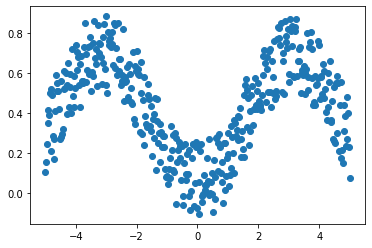

In [3]:
# Visualize 
x = np.linspace(-5, 5, 400)
eps = np.random.uniform(-0.2, 0.2, len(x))
y = f(x) + eps 
plt.scatter(x,y);

In [4]:
# Define a neural network 
class MyNet(nn.Module):
  def __init__(self, D_in, H, D_out):
    """ Custom network with sine activation.

    Args:
      D_in (int): dimension of the input
      H (int): dimension of the hidden layer(s)
      D_out (int): dimension of the output

    """
    super(MyNet, self).__init__()
    self.linear1 = nn.Linear(D_in, H)
    self.linear2 = nn.Linear(H, D_out)
    self.sin = tch.sin

    return 

  def forward(self, x):
    out = self.linear1(x)
    out = self.sin(out)
    out = self.linear2(out)

    return out 

In [5]:
# Put np.arrays into tch.tensors
X = tch.tensor(x.reshape(-1,1)).float()
Y = tch.tensor(y.reshape(-1,1)).float()

# Split into train and test sets (70/30)
ntrain = int(0.7*len(X))
idx = tch.tensor(np.random.choice(np.arange(len(X)), ntrain, replace=False))
xtrain = X[idx]
xtest = X[~idx]
ytrain = Y[idx]
ytest = Y[~idx]

In [6]:
# Initialize model object
model = MyNet(1, 2, 1)

In [7]:
# Define optimizer and loss function
optimizer = optim.Adam(model.parameters(), weight_decay=1e-2)
loss_fn = nn.MSELoss()

In [8]:
# Train the model
it = 0
loss_val = 10

while (loss_val > 1e-4) and (it < 5000):
  y_pred = model(xtrain)
  loss = loss_fn(y_pred, ytrain)
  loss_val = loss.item()

  if it % 500 == 0:
    print("Epoch: {} {} Loss: {}".format(it, '\t', round(loss_val, 4)))

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  it += 1

print("Loss after all iterations: ", round(loss_val,4))

Epoch: 0 	 Loss: 0.4731
Epoch: 500 	 Loss: 0.0416
Epoch: 1000 	 Loss: 0.0247
Epoch: 1500 	 Loss: 0.0182
Epoch: 2000 	 Loss: 0.0153
Epoch: 2500 	 Loss: 0.0146
Epoch: 3000 	 Loss: 0.0144
Epoch: 3500 	 Loss: 0.0144
Epoch: 4000 	 Loss: 0.0144
Epoch: 4500 	 Loss: 0.0144
Loss after all iterations:  0.0144


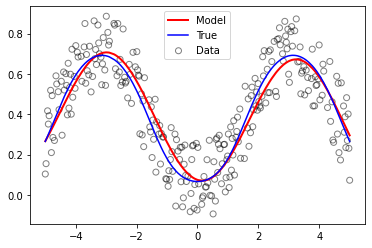

In [9]:
# Visually inspect model fit on test set
model = model.eval()
yp = model(xtest)
idx = tch.argsort(xtest.flatten())
plt.scatter(xtest, ytest, facecolor='none', edgecolor='k', 
            alpha=0.5, label='Data')
plt.plot(xtest.flatten()[idx], yp.detach().flatten()[idx], c='r', 
         linewidth=2, label='Model')
plt.plot(xtest.numpy().flatten()[idx], f(xtest.numpy().flatten())[idx], 
         c='b', label='True')
plt.legend();

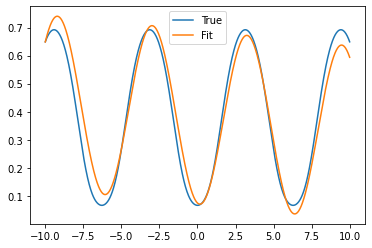

In [10]:
# Fit model on data outside of the original range
newx = np.linspace(-10,10,1000)
newy = f(newx)
plt.plot(newx, newy, label='True')

y_fit = model(tch.tensor(newx).reshape(-1,1).float())
plt.plot(newx, y_fit.detach(), label='Fit')
plt.legend();